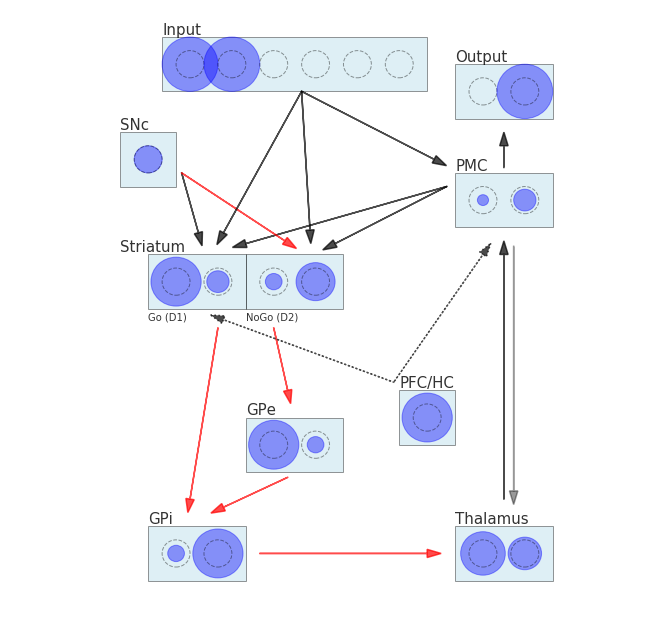

In [9]:
import matplotlib.pyplot as plt
#import numpy as np
from matplotlib.patches import Circle, Rectangle, Arrow

def genneuron(x, y, output):
    nlist = []
    mneuron = Circle((x, y), output, color='blue') 
    mneuron.set_alpha(0.4)
    nlist.append(mneuron)
    mneuronBase = Circle((x, y), 0.5, color='black', fill=False, linestyle='dashed') 
    mneuronBase.set_alpha(0.4)
    nlist.append(mneuronBase)
    return nlist

def genlayer(x, y, outputs):
    objlist = []
    for i,n in enumerate(outputs):
        objlist += genneuron(x+1+i*1.5, y+1, output=n)
    rect = Rectangle((x, y), 2+(len(outputs)-1)*1.5, 2, color='lightblue', ec='black', zorder=-1)
    rect.set_alpha(0.4)
    objlist.append(rect)
    return objlist

def putarrow(fig, x1, y1, x2, y2, lstyle='solid', lcolor='black', transp=0.7):
    fig.arrow(x1, y1, x2-x1, y2-y1, head_width=0.3, head_length=0.5, linewidth=1.5, fc=lcolor, ec=lcolor, alpha=transp, 
              linestyle=lstyle)

plt.figure(1, figsize=(11,11))
fig = plt.subplot(111)

""" ----------- Striatum ----------- """
Striatum = []
xStriatumGo, yStriatumGo = 2, 10
Striatum += genlayer(xStriatumGo, yStriatumGo, outputs=[0.9, 0.4])
plt.text(xStriatumGo-1, yStriatumGo+2, "Striatum", size=15, ha="left", va="bottom", alpha=0.8)
plt.text(xStriatumGo, yStriatumGo-0.1, "Go (D1)", size=10, ha="left", va="top", alpha=0.8)
xStriatumNoGo, yStriatumNoGo = 5.5, 10
Striatum += genlayer(xStriatumNoGo, yStriatumNoGo, outputs=[0.3, 0.7])
plt.text(xStriatumNoGo, yStriatumNoGo-0.1, "NoGo (D2)", size=10, ha="left", va="top", alpha=0.8)

""" ----------- GPe ----------- """
GPe = []
xGPe, yGPe = 5.5, 4
GPe += genlayer(xGPe, yGPe, outputs=[0.9, 0.3])
plt.text(xGPe, yGPe+2, "GPe", size=15, ha="left", va="bottom", alpha=0.8)

""" ----------- GPi ----------- """
GPi = []
xGPi, yGPi = 2, 0
GPi += genlayer(xGPi, yGPi, outputs=[0.3, 0.9])
plt.text(xGPi, yGPi+2, "GPi", size=15, ha="left", va="bottom", alpha=0.8)

""" ----------- Thalamus ----------- """
Thalamus = []
xThalamus, yThalamus = 13, 0
Thalamus += genlayer(xThalamus, yThalamus, outputs=[0.8, 0.6])
plt.text(xThalamus, yThalamus+2, "Thalamus", size=15, ha="left", va="bottom", alpha=0.8)

""" ----------- PMC ----------- """
PMC = []
xPMC, yPMC = 13, 13
PMC += genlayer(xPMC, yPMC, outputs=[0.2, 0.4])
plt.text(xPMC, yPMC+2, "PMC", size=15, ha="left", va="bottom", alpha=0.8)

""" ----------- Output ----------- """
Output = []
xOutput, yOutput = 13, 17
Output += genlayer(xOutput, yOutput, outputs=[0.0, 1.0])
plt.text(xOutput, yOutput+2, "Output", size=15, ha="left", va="bottom", alpha=0.8)

""" ----------- SNc ----------- """
SNc = []
xSNc, ySNc = 1, 14.5
SNc += genlayer(xSNc, ySNc, outputs=[0.5])
plt.text(xSNc, ySNc+2, "SNc", size=15, ha="left", va="bottom", alpha=0.8)

""" ----------- Input ----------- """
Input = []
xInput, yInput = 2.5, 18
Input += genlayer(xInput, yInput, outputs=[1, 1, 0, 0, 0, 0])
plt.text(xInput, yInput+2, "Input", size=15, ha="left", va="bottom", alpha=0.8)

""" ----------- PFC/HC ----------- """
PFC_HC = []
xPFC_HC, yPFC_HC = 11, 5
PFC_HC += genlayer(xPFC_HC, yPFC_HC, outputs=[0.9])
plt.text(xPFC_HC, yPFC_HC+2, "PFC/HC", size=15, ha="left", va="bottom", alpha=0.8)


theNetwork = Striatum + GPe + GPi + Thalamus + PMC + Output + SNc + Input + PFC_HC
for multineuron in theNetwork:
    fig.add_artist(multineuron)


putarrow(fig, xStriatumNoGo+1, yStriatumNoGo-0.7, xGPe+1.5, yGPe+3, lcolor='red')
putarrow(fig, xStriatumGo+2.5, yStriatumGo-0.7, xGPi+1.5, yGPi+3, lcolor='red')
putarrow(fig, xGPe+1.5, yGPe-0.2, xGPi+2.7, yGPi+2.7, lcolor='red')
putarrow(fig, xGPi+4, yGPi+1, xThalamus-1, yThalamus+1, lcolor='red')
putarrow(fig, xThalamus+1.75, yThalamus+3, xPMC+1.75, yPMC-1)
putarrow(fig, xPMC+2.1, yPMC-0.7, xThalamus+2.1, yThalamus+3.3, transp=0.4)
putarrow(fig, xPMC-0.3, yPMC+1.5, xStriatumGo+3.5, yStriatumGo+2.4)
putarrow(fig, xPMC-0.3, yPMC+1.5, xStriatumNoGo+3.2, yStriatumNoGo+2.4)
putarrow(fig, xPMC+1.75, yPMC+2.2, xOutput+1.75, yOutput-1)
putarrow(fig, xSNc+2.2, ySNc+0.5, xStriatumGo+1.8, yStriatumGo+2.8)
putarrow(fig, xSNc+2.2, ySNc+0.5, xStriatumNoGo+1.4, yStriatumNoGo+2.5, lcolor='red')
putarrow(fig, xInput+5, yInput, xStriatumGo+2.7, yStriatumGo+2.8)
putarrow(fig, xInput+5, yInput, xStriatumNoGo+2.3, yStriatumNoGo+2.9)
putarrow(fig, xInput+5, yInput, xPMC-0.75, yPMC+2.5)
putarrow(fig, xPFC_HC-0.2, yPFC_HC+2.3, xPMC+1, yPMC-1, 'dotted')
putarrow(fig, xPFC_HC-0.2, yPFC_HC+2.3, xStriatumGo+2.7, yStriatumGo-0.4, lstyle='dotted')

psize = 22
plt.xlim(-2, -2 + psize)
plt.ylim(-1, -1 + psize)
plt.axis('off')

plt.savefig('cnnet.pdf')
plt.show()